In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_diabetes

In [5]:
dataset=load_diabetes()

In [6]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
dataset['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [8]:
x=pd.DataFrame(dataset['data'],columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [9]:
## dependent and independent data
y=dataset['target']

In [10]:
## now lets us perform the train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=42
                                              )
X_train.shape,X_test.shape

((309, 10), (133, 10))

In [35]:
# X_train.corr()

In [41]:
## It time to train the model lets go
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='friedman_mse',
 max_depth=4,
 max_features='log2',
 splitter= 'best')


In [42]:
model.fit(X_train,Y_train)

,criterion,'friedman_mse'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [43]:
y_pred=model.predict(X_test)

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_pred,Y_test))
print(mean_absolute_error(y_pred,Y_test))

-0.4638668365617338
53.30246552737154


[Text(0.5, 0.9, 'x[6] <= -0.016\nfriedman_mse = 6151.551\nsamples = 309\nvalue = 149.362'),
 Text(0.25, 0.7, 'x[3] <= 0.059\nfriedman_mse = 6040.644\nsamples = 118\nvalue = 190.983'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[4] <= -0.006\nfriedman_mse = 5641.976\nsamples = 96\nvalue = 178.448'),
 Text(0.0625, 0.3, 'x[2] <= 0.023\nfriedman_mse = 6374.433\nsamples = 46\nvalue = 162.848'),
 Text(0.03125, 0.1, 'friedman_mse = 3035.296\nsamples = 32\nvalue = 131.219'),
 Text(0.09375, 0.1, 'friedman_mse = 6493.551\nsamples = 14\nvalue = 235.143'),
 Text(0.1875, 0.3, 'x[9] <= 0.117\nfriedman_mse = 4538.24\nsamples = 50\nvalue = 192.8'),
 Text(0.15625, 0.1, 'friedman_mse = 4270.895\nsamples = 48\nvalue = 188.646'),
 Text(0.21875, 0.1, 'friedman_mse = 600.25\nsamples = 2\nvalue = 292.5'),
 Text(0.375, 0.5, 'x[4] <= -0.022\nfriedman_mse = 4102.671\nsamples = 22\nvalue = 245.682'),
 Text(0.3125, 0.3, 'x[6] <= -0.034\nfriedman_mse = 992.64\nsamples = 5\nvalue = 291.6'),
 Text(0.28125, 0.1

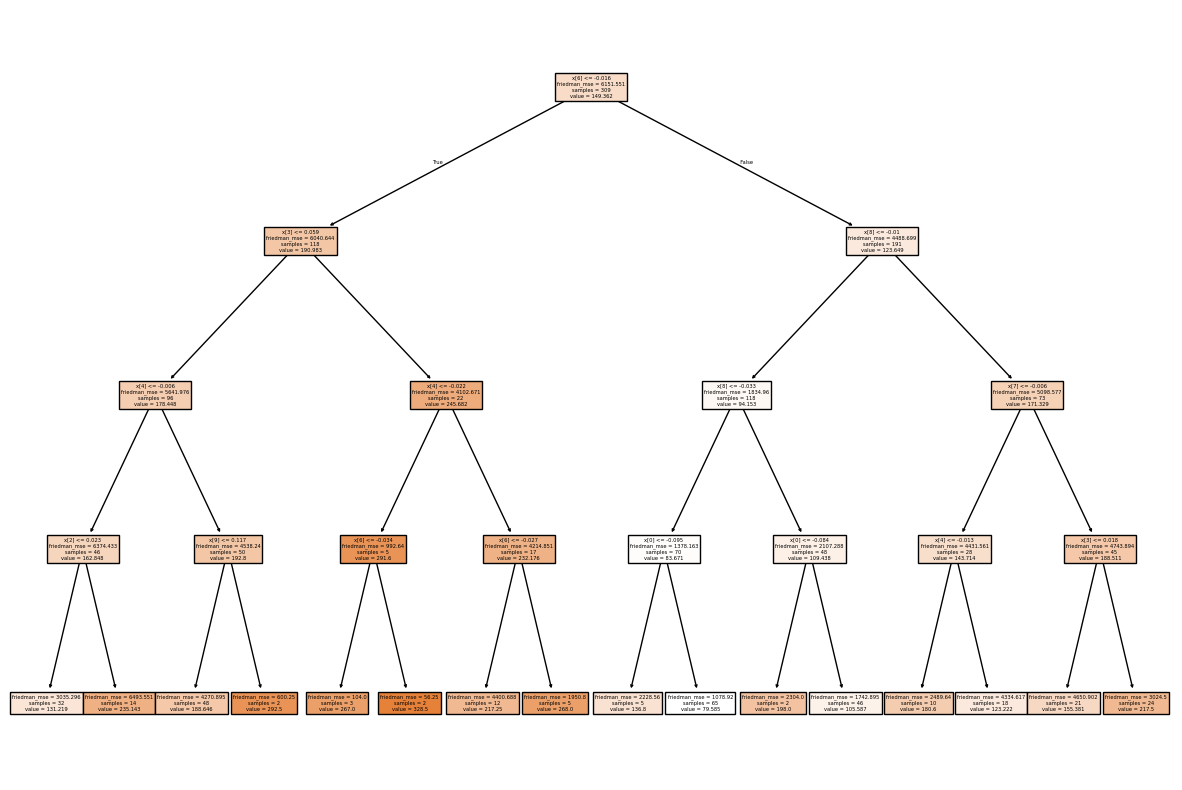

In [45]:
plt.figure(figsize=(15,10))
from sklearn import tree
tree.plot_tree(model,filled=True)

In [17]:
## As we can see we are getting very bad accuracy we x=can imporve it by hyperparameter tunning

## Hyperparameter- Tunning

In [18]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [28]:
from sklearn.model_selection import GridSearchCV
Treemodel=DecisionTreeRegressor()
grid=GridSearchCV(Treemodel,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [29]:
grid


,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [30]:
grid.fit(X_train,Y_train)

c:\Users\ghali\OneDrive\Desktop\ml\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ghali\OneDrive\Desktop\ml\python\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ghali\OneDrive\Desktop\ml\python\venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\ghali\OneDrive\Desktop\ml\python\venv\Lib\site-packages\sklearn\base.py", line 471, in _validate_par

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [31]:
y_pred=grid.predict(X_test)

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_pred,Y_test))
print(mean_absolute_error(y_pred,Y_test))

-0.3283068180380664
52.55787439377664


In [33]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [34]:
grid.best_score_

np.float64(-3805.3283267948327)